In [56]:
!pip install influxdb-client

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip


In [92]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [58]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org
)
query_api = client.query_api()

{'bucket': 'Temporary', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [77]:
query_standard = 'from(bucket:"Experiment")\
|> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|host_id/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policy_id == 1)'
result_standard = query_api.query_data_frame(org=org, query=query_standard)

#display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard = result_standard[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_standard)

     timestamp  host_id  cpuUtilisation  guestsRunning  powerUsage   
0       1000.0      0.0        0.500000           12.0  218.750000  \
1       1000.0      1.0        0.541667           13.0  223.838976   
2       1000.0      2.0        0.416667           10.0  210.850694   
3       1000.0      3.0        0.416667           10.0  210.850694   
4       1000.0      4.0        0.291667            7.0  203.721788   
..         ...      ...             ...            ...         ...   
369    11000.0     29.0        0.041667            1.0  200.010851   
370    11000.0     30.0        0.041667            1.0  200.010851   
371    11000.0     31.0        0.041667            1.0  200.010851   
372    11000.0     32.0        0.000000            0.0  200.000000   
373    11000.0     33.0        0.041667            1.0  200.010851   

       powerTotal  
0    2.451133e+05  
1    4.904217e+05  
2    7.352067e+05  
3    9.788205e+05  
4    1.222501e+06  
..            ...  
369  8.491048e+07  

In [78]:
query_heft = 'from(bucket:"Experiment")\
|> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|host_id/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policy_id == 2)'
result_heft = query_api.query_data_frame(org=org, query=query_heft)

df_heft = result_heft[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_heft)

     timestamp  host_id  cpuUtilisation  guestsRunning  powerUsage   
0       1000.0      0.0        0.500000           12.0  218.750000  \
1       1000.0      1.0        0.541667           13.0  223.838976   
2       1000.0      2.0        0.416667           10.0  210.850694   
3       1000.0      3.0        0.416667           10.0  210.850694   
4       1000.0      4.0        0.291667            7.0  203.721788   
..         ...      ...             ...            ...         ...   
335    10000.0     29.0        0.041667            1.0  200.010851   
336    10000.0     30.0        0.083333            2.0  200.086806   
337    10000.0     31.0        0.041667            1.0  200.010851   
338    10000.0     32.0        0.041667            1.0  200.010851   
339    10000.0     33.0        0.041667            1.0  200.010851   

       powerTotal  
0    2.451133e+05  
1    4.904217e+05  
2    7.352067e+05  
3    9.788205e+05  
4    1.222501e+06  
..            ...  
335  7.793107e+07  

In [79]:
query_random = 'from(bucket:"Experiment")\
|> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|host_id/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policy_id == 3)'
result_random = query_api.query_data_frame(org=org, query=query_random)

df_random = result_random[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_random)

     timestamp  host_id  cpuUtilisation  guestsRunning  powerUsage   
0       1000.0      0.0        0.083333            2.0  200.086806  \
1       1000.0      1.0        0.083333            2.0  200.086806   
2       1000.0      2.0        0.083333            2.0  200.086806   
3       1000.0      3.0        0.083333            2.0  200.086806   
4       1000.0      4.0        0.083333            2.0  200.086806   
..         ...      ...             ...            ...         ...   
505    15000.0     29.0        0.958333           23.0  332.020399   
506    15000.0     30.0        1.000000           24.0  350.000000   
507    15000.0     31.0        0.958333           23.0  332.020399   
508    15000.0     32.0        0.958333           23.0  332.020399   
509    15000.0     33.0        1.000000           24.0  350.000000   

       powerTotal  
0    2.094128e+05  
1    4.195784e+05  
2    6.297628e+05  
3    8.426643e+05  
4    1.052307e+06  
..            ...  
505  1.100548e+08  

In [80]:
query_minmin = 'from(bucket:"Experiment")\
|> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|host_id/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policy_id == 4)'
result_minmin = query_api.query_data_frame(org=org, query=query_minmin)

df_minmin = result_minmin[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_minmin)

     timestamp  host_id  cpuUtilisation  guestsRunning  powerUsage   
0       1000.0      0.0        0.500000           12.0  218.750000  \
1       1000.0      1.0        0.541667           13.0  223.838976   
2       1000.0      2.0        0.416667           10.0  210.850694   
3       1000.0      3.0        0.416667           10.0  210.850694   
4       1000.0      4.0        0.291667            7.0  203.721788   
..         ...      ...             ...            ...         ...   
335    10000.0     29.0        0.041667            1.0  200.010851   
336    10000.0     30.0        0.083333            2.0  200.086806   
337    10000.0     31.0        0.041667            1.0  200.010851   
338    10000.0     32.0        0.041667            1.0  200.010851   
339    10000.0     33.0        0.041667            1.0  200.010851   

       powerTotal  
0    2.451133e+05  
1    4.904217e+05  
2    7.352067e+05  
3    9.788205e+05  
4    1.222501e+06  
..            ...  
335  7.793107e+07  

In [87]:
df_total_power_standard = df_standard[['timestamp','host_id','powerTotal']]
df_total_power_standard['host_id'] = df_total_power_standard['host_id']. astype(int)
df_total_power_standard = df_total_power_standard.loc[df_total_power_standard['host_id'] == 33]
print(df_total_power_standard)

     timestamp  host_id    powerTotal
33      1000.0       33  8.309371e+06
67      2000.0       33  1.610046e+07
101     3000.0       33  2.417643e+07
135     4000.0       33  3.172351e+07
169     5000.0       33  4.018811e+07
203     6000.0       33  4.791615e+07
237     7000.0       33  5.581547e+07
271     8000.0       33  6.394212e+07
305     9000.0       33  7.184868e+07
339    10000.0       33  7.865005e+07
373    11000.0       33  8.574522e+07


/tmp/ipykernel_6981/2689543323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_standard['host_id'] = df_total_power_standard['host_id']. astype(int)


In [88]:
df_total_power_heft = df_heft[['timestamp','host_id','powerTotal']]
df_total_power_heft['host_id'] = df_total_power_heft['host_id']. astype(int)
df_total_power_heft = df_total_power_heft.loc[df_total_power_heft['host_id'] == 33]
print(df_total_power_heft)

     timestamp  host_id    powerTotal
33      1000.0       33  8.309371e+06
67      2000.0       33  1.610046e+07
101     3000.0       33  2.417643e+07
135     4000.0       33  3.172351e+07
169     5000.0       33  4.018811e+07
203     6000.0       33  4.791615e+07
237     7000.0       33  5.581262e+07
271     8000.0       33  6.367144e+07
305     9000.0       33  7.175391e+07
339    10000.0       33  7.875559e+07


/tmp/ipykernel_6981/149652282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_heft['host_id'] = df_total_power_heft['host_id']. astype(int)


In [89]:
df_total_power_random = df_random[['timestamp','host_id','powerTotal']]
df_total_power_random['host_id'] = df_total_power_random['host_id']. astype(int)
df_total_power_random = df_total_power_random.loc[df_total_power_random['host_id'] == 33]
print(df_total_power_random)

     timestamp  host_id    powerTotal
33      1000.0       33  7.149678e+06
67      2000.0       33  1.428731e+07
101     3000.0       33  2.142049e+07
135     4000.0       33  2.823651e+07
169     5000.0       33  3.593509e+07
203     6000.0       33  4.346044e+07
237     7000.0       33  5.088945e+07
271     8000.0       33  5.859287e+07
305     9000.0       33  6.603466e+07
339    10000.0       33  7.379242e+07
373    11000.0       33  8.145278e+07
407    12000.0       33  8.911018e+07
441    13000.0       33  9.672417e+07
475    14000.0       33  1.037710e+08
509    15000.0       33  1.108955e+08


/tmp/ipykernel_6981/1306925247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_random['host_id'] = df_total_power_random['host_id']. astype(int)


In [90]:
df_total_power_minmin = df_minmin[['timestamp','host_id','powerTotal']]
df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)
df_total_power_minmin = df_total_power_minmin.loc[df_total_power_minmin['host_id'] == 33]
print(df_total_power_minmin)

     timestamp  host_id    powerTotal
33      1000.0       33  8.309371e+06
67      2000.0       33  1.610046e+07
101     3000.0       33  2.417643e+07
135     4000.0       33  3.172351e+07
169     5000.0       33  4.018811e+07
203     6000.0       33  4.791615e+07
237     7000.0       33  5.581262e+07
271     8000.0       33  6.367144e+07
305     9000.0       33  7.175391e+07
339    10000.0       33  7.875559e+07


/tmp/ipykernel_6981/3229142137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)


    timestamp    powerTotal  powerTotal_y  powerTotal_z  powerTotal_w
0      1000.0  8.309371e+06  8.309371e+06  7.149678e+06  8.309371e+06
1      2000.0  1.610046e+07  1.610046e+07  1.428731e+07  1.610046e+07
2      3000.0  2.417643e+07  2.417643e+07  2.142049e+07  2.417643e+07
3      4000.0  3.172351e+07  3.172351e+07  2.823651e+07  3.172351e+07
4      5000.0  4.018811e+07  4.018811e+07  3.593509e+07  4.018811e+07
5      6000.0  4.791615e+07  4.791615e+07  4.346044e+07  4.791615e+07
6      7000.0  5.581547e+07  5.581262e+07  5.088945e+07  5.581262e+07
7      8000.0  6.394212e+07  6.367144e+07  5.859287e+07  6.367144e+07
8      9000.0  7.184868e+07  7.175391e+07  6.603466e+07  7.175391e+07
9     10000.0  7.865005e+07  7.875559e+07  7.379242e+07  7.875559e+07
10    11000.0  8.574522e+07  0.000000e+00  8.145278e+07  0.000000e+00
11    12000.0  0.000000e+00  0.000000e+00  8.911018e+07  0.000000e+00
12    13000.0  0.000000e+00  0.000000e+00  9.672417e+07  0.000000e+00
13    14000.0  0.000

Text(0, 0.5, 'Total power consumption in MegaWatts')

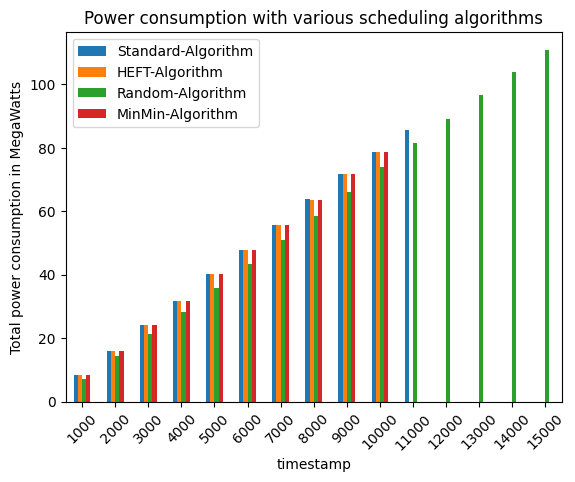

In [116]:
df1 = df_total_power_standard.drop(['host_id'], axis=1)
df2 = df_total_power_heft.drop(['host_id'], axis=1)
df3 = df_total_power_random.drop(['host_id'], axis=1)
df4 = df_total_power_minmin.drop(['host_id'], axis=1)
# print(df1)
# Create a list of all the dataframes
dfs = [df1, df2, df3, df4]

# Create a new dataframe with all the timestamps from all the dataframes
df_timestamps = pd.DataFrame({'timestamp': sorted(set(sum([df['timestamp'].tolist() for df in dfs], [])))})

# Merge the new dataframe with all the dataframes, filling in missing values with 0
df_merged = df_timestamps.merge(df1, how='left', on='timestamp', suffixes=('', '_x')).merge(df2, how='left', on='timestamp', suffixes=('', '_y')).merge(df3, how='left', on='timestamp', suffixes=('', '_z')).merge(df4, how='left', on='timestamp', suffixes=('', '_w')).fillna(0)

print(df_merged)
df_merged["powerTotal"] = df_merged["powerTotal"]/1000000
df_merged["powerTotal_y"] = df_merged["powerTotal_y"]/1000000
df_merged["powerTotal_z"] = df_merged["powerTotal_z"]/1000000
df_merged["powerTotal_w"] = df_merged["powerTotal_w"]/1000000
df_merged.rename(columns={'powerTotal': 'Standard-Algorithm', 'powerTotal_y': 'HEFT-Algorithm', 'powerTotal_z': 'Random-Algorithm', 'powerTotal_w': 'MinMin-Algorithm'}, inplace=True)
df_merged['timestamp'] = df_merged['timestamp'].astype(int)
# Create a bar plot of the merged dataframe, grouped by timestamp
# df_merged.groupby('timestamp').plot(x='timestamp', y=['powerTotal', 'powerTotal_y', 'powerTotal_z', 'powerTotal_w'], kind='bar', bar_label=True)
# plt.figure(figsize=(10, 6))
# # df_merged.plot(x='timestamp', y=['powerTotal', 'powerTotal_y', 'powerTotal_z', 'powerTotal_w'], kind='bar', stacked=True)
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.title('Bar plot of 4 dataframes with different row counts')
# plt.xticks(rotation=45)
# plt.legend(title='Dataframes')
# plt.tight_layout()
# plt.show()
fig, ax = plt.subplots()
df_merged.plot.bar(x='timestamp', ax=ax, title='Power consumption with various scheduling algorithms')
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('Total power consumption in MegaWatts')